## Московский Физико-технический Институт

# Лабораторная работа №2

# "Численное решение систем нелинейных уравнений"

_Выполнил:_
_Ступак Дмитрий_ 
_Б03-207_

Долгопрудный, 2024

# 1. Постановка задачи:

Получить решение системы уравнений
$$
\left\{
\begin{aligned}
& (x - 1.4)^2 + (y - 0.6)^2 = 1 \\
& 4.2x^2 + 8.8y^2 = 1.4.
\end{aligned}
\right.
$$
Методами Простой итерации, Ньютона и Наискорейшего спуска с точность $eps = 10^{-5}$

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
eps = 10e-5
max_iter = 1000

In [63]:
def y1(x):
    return -(1 - (x - 1.4) ** 2) ** 0.5 + 0.6


def y2(x):
    return ((1.4 - 4.2 * x ** 2) / 8.8) ** 0.5

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_3200\3008248932.py:2: RuntimeWarning: invalid value encountered in sqrt
  return -(1 - (x - 1.4) ** 2) ** 0.5 + 0.6
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_3200\3008248932.py:6: RuntimeWarning: invalid value encountered in sqrt
  return ((1.4 - 4.2 * x ** 2) / 8.8) ** 0.5


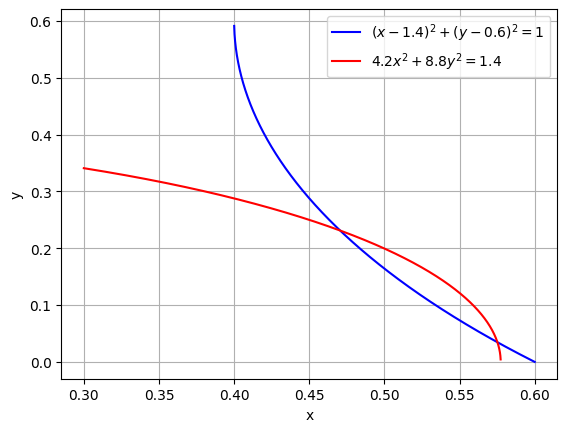

In [64]:
x=np.linspace(0.3, 0.6, 5000)
z=np.linspace(0.3, 0.6, 5000)
plt.figure()
plt.grid()
plt.plot(x, y1(x), color='b', label=r'$(x - 1.4)^2 + (y - 0.6)^2 = 1$')
plt.plot(z, y2(z),color='r',  label=r'$4.2x^2 + 8.8y^2 = 1.4$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2. Локализация решения:
_Корни, полученные с помощью Desmos_ 
* (0.47051, 0.23116)
* (0.57517, 0.03462)

_Локализация, исходя из графического решения_
1 решение: $\( X \in (0.4; 0.5) \), \( Y \in (0.2; 0.3) \)$ 
2 решение: $\( X \in (0.55; 0.65) \), \( Y \in (0; 0.1) \)$

# 3. Метод Простой Итерации

**Формула метода:** 

$$
\vec{f}(\vec{x}) = \vec{0} \Rightarrow \vec{x}_{n+1} = \vec{\varphi}(\vec{x})
$$

**Условие сходимости:** Пусть наши функции $\(\varphi(x)\)$ непрерывно-дифференцируемы в некоторой достаточно малой области \(G\), содержащей решение системы.
$$
\|M\| \leq q < 1, \quad \mu_{ij} = \max_{x \in G} \left| \frac{\partial \varphi_i(x)}{\partial x_j} \right|
$$

**Условие достижения заданной точности:** Условие остановки 
$$
|\vec{x}_{n+1} - \vec{x}_n| < \epsilon (1 - q)
$$

**Для нашей задачи:**

$$
\left\{
\begin{aligned}
& x_{n+1} = \sqrt{\frac{1.4 - 4.2x_n^2}{8.8}} = \varphi_1 \\
& y_{n+1} = -\sqrt{1 - (y_n - 0.6)^2} + 1.4 = \varphi_2
\end{aligned}
\right.
$$

$
\varphi_1, \varphi_2 \in C_1(G) \Rightarrow \text{Условие сходимости выполняется}
$

### Построим матрицу M:

$$
\frac{\partial \varphi_1}{\partial x} = \frac{-1.41582x}{\sqrt{1.4 - 4.2 x^2}}, \quad \frac{\partial \varphi_1}{\partial y} = 0, \quad \frac{\partial \varphi_2}{\partial x} = 0, \quad \frac{\partial \varphi_2}{\partial y} = \frac{y - 0.6}{\sqrt{1 - (y - 0.6)^2}}
$$

$$
\max \left( \frac{\partial \varphi_1}{\partial x} = 0.664 \right), \quad \max \left( \frac{\partial \varphi_2}{\partial y} = 0.314 \right)
$$

$$
M = \begin{pmatrix}
0.664 & 0\\
0 & 0.314
\end{pmatrix}, \quad \|M\| = 0.208 \quad \Rightarrow q = 0.208 \quad \Rightarrow \text{метод сходится}
$$

### Условие остановки:

$$
|\vec{x}_{n+1} - \vec{x}_n| < 8 \times 10^{-6}
$$

### Оценка количества итераций:

$$
q^n \left( \frac{\varepsilon (1 - q)}{\|\vec{x}_1 - \vec{x}_0\|} \right) \Rightarrow n = \log_q \left( \frac{\varepsilon (1 - q)}{\|\vec{x}_1 - \vec{x}_0\|} \right)
$$

$$
\|\vec{x}_1 - \vec{x}_0\| = \sqrt{0.2001^2 + 0.2133^2} = 0.29247 \Rightarrow n = \log_{0.208} \left( \frac{8 \times 10^{-6}}{0.29247} \right) = 6.7
$$
    

In [65]:
def g1(x):
    return np.sqrt((1.4 - 4.2 * x**2) / 8.8)


def g2(y):
    return -np.sqrt(1 - (y - 0.6)**2)  + 1.4

In [66]:
def msi(x, y, g1, g2, tol=eps, max_iter = 1000):
    val_f = []
    val_f.append([round(x.real, 5), round(y.real, 5), g1(y), g2(x), 0])
    k = 1
    for i in range(max_iter):
        k += 1
        y0 = y
        x0 = x
        x = g1(y0)
        y = g2(x0)
        val_f.append([round(y0.real, 5), round(x0.real, 5), g1(y), g2(x), max(abs(y - y0), abs(x - x0))])
        
        if max(abs(y - y0), abs(x - x0))  < tol:
            break
    
    if k < max_iter:
        return pd.DataFrame(data=val_f, columns=['x', 'y', 'g1(y)', 'g2(x)', 'delta'])
    else:
        return 'Не сходится'

In [67]:
x, y = 0.45, 0.25
msi(x, y, g1, g2)   

,x,y,g1(y),g2(x),delta
0,0.45000,0.25000,0.359529,0.411314,0.000000
1,0.25000,0.45000,0.279904,0.429344,0.161314
2,0.41131,0.35953,0.266669,0.452615,0.079625
3,0.42934,0.27990,0.247622,0.457190,0.023271
4,0.45261,0.26667,0.243578,0.464142,0.019047
5,0.45719,0.24762,0.237219,0.465675,0.006952
6,0.46414,0.24358,0.235781,0.468125,0.006358
7,0.46568,0.23722,0.233454,0.468687,0.002450
8,0.46813,0.23578,0.232916,0.469600,0.002327
9,0.46869,0.23345,0.232036,0.469812,0.000914


#### За 16 итераций МПИ получили ответ (0.47041,0.23129), что с высокой точностью совпадает с реальными значениями

# 4.Метод Ньютона
## Формула метода:

$$
\vec{f}(\vec{x}^*) = \vec{0} = \vec{f}(\vec{x}_n) + \vec{f}'_x(\vec{x}^*)(\vec{\xi})(\vec{x}^* - \vec{x}_n)
$$

$$
\vec{x}_{n+1} = \vec{x}_n - (\vec{f}'_x)^{-1}_n(\vec{x}_n), \quad n = 0, 1, 2...
$$

## Условие сходимости:

Th о сходимости: $\( f_i(\vec{x}) \)$ непрерывна в месте с 1 производной в $\( G \)$, содержащей решение системы $\( \Rightarrow \exists \)$ окр-сть $\( R \)$, в которой $\( R = \left\{ \|\vec{x}^* - \vec{x}\| < \delta \right\} \)$, что при $\( \forall \vec{x}_0 \in R \)$ последовательность приближений в методе Ньютона сходится к решению $\( \vec{x}^* \)$.

## Для нашей задачи:

$$
\begin{cases}
f_1 = (x - 1.4)^2 + (y - 0.6)^2 - 1 \\
f_2 = 4.2x^2 + 8.8y^2 - 1.4
\end{cases}
$$

Матрица Якоби:

$$
\left( \begin{array}{cc}
2(x-1) & 2(y-0.6) \\
8.4x & 17.6y
\end{array} \right) = \frac{\partial F}{\partial \vec{\xi}}
$$

Обратная матрица Якоби:

$$
\left( \frac{\partial F}{\partial \vec{\xi}} \right)^{-1} = \frac{1}{18.4xy + 10.08x - 49.28y} \left( \begin{array}{cc}
17.6y & -2(y-0.6) \\
-8.4x & 2(x-1)
\end{array} \right)
$$

## Сходимость:

Метод сходится, так как $\( f_1, f_2 \)$ непрерывны вместе со всеми своими производными в $\( R^2 \)$.

$$
\begin{pmatrix}
x_{n+1} \\
y_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
x_n \\
y_n
\end{pmatrix}
-
\frac{1}{18.4y_n^2 + 10.08x_n - 49.28y_n}
\begin{pmatrix}
17.6y_n & -2(y_n-0.6) \\
-8.4x_n & 2(x_n-1)
\end{pmatrix}
\begin{pmatrix}
(x_n - 1.4)^2 + (y_n - 0.6)^2 - 1 \\
4.2x_n^2 + 8.8y_n^2 - 1.4
\end{pmatrix}
$$


$$
x_{n+1} = x_n - \left( \frac{1}{18.4 x_n y_n + 10.08 x_n - 49.28 y_n} \right) \left( 17.6 y_n ((x_n - 1.4)^2 + (y_n - 0.6)^2 - 1) - 2 (y_n - 0.6) \left( 4.2 x_n^2 + 8.8 y_n^2 - 1.4 \right) \right)
$$

$$
y_{n+1} = y_n - \left( \frac{1}{18.4 x_n y_n + 10.08 x_n - 49.28 y_n} \right) \left( -8.4 x_n ((x_n - 1.4)^2 + (y_n - 0.6)^2 - 1) + 2 (x_n - 1.4) \left( 4.2 x_n^2 + 8.8 y_n^2 - 1.4 \right) \right)
$$



In [68]:
def f1(x, y):
    return (x - 1.4) ** 2 + (y - 0.6) ** 2 - 1


def f2(x, y):
    return 4.2 * x ** 2 + 8.8 * y ** 2 - 1.4

In [69]:
def newton(x, y, f1, f2, tol=eps, max_iter = 1000):
    val_f = []
    val_f.append([round(x.real, 5), round(y.real, 5), g1(y), g2(x), 0])
    k = 1
    for i in range(max_iter):
        k += 1
        y0 = y
        x0 = x
        x = x -(1 / (18.4 * x * y + 10.08 * x - 49.28 * y)) * (17.6 * y * f1(x, y) - 2 *(y - 0.6) * f2(x, y))
        y = y -(1 / (18.4 * x * y + 10.08 * x - 49.28 * y)) * (-8.4 * x * f1(x, y) + 2 * (x - 1.4) * f2(x, y))
        val_f.append([round(x0.real, 5), round(y0.real, 5), g1(y), g2(x), max(abs(y - y0), abs(x - x0))])
        
        if max(abs(y - y0), abs(x - x0))  < tol:
            break
    
    if k < max_iter:
        return pd.DataFrame(data=val_f, columns=['x', 'y', 'f1(x, y)', 'f2(x, y)', 'delta'])
    else:
        return 'Не сходится'

In [70]:
x, y = 0.45, 0.25
newton(x, y, f1, f2) 

,x,y,"f1(x, y)","f2(x, y)",delta
0,0.45000,0.25000,0.359529,0.411314,0.000000
1,0.45000,0.25000,0.365095,0.408576,0.019312
2,0.46931,0.23249,0.365496,0.408420,0.001324
3,0.47050,0.23116,0.365498,0.408419,0.000008


#### За 3 итераций метода Ньютона получили ответ (0.47050,0.23116), что с высокой точностью совпадает с реальными значениями

## 5. Метод наискорейшего спуска

### Формулы метода:

$$ 
F(\vec{x}) = \sum_{i=1}^{n} f_i^2(\vec{x}) 
$$

### Минимум функции в направлении антиградиента:

$$ 
x_i^{k+1} = x_i^k - \lambda_k \frac{\partial F(\vec{x}^k)}{\partial x_i} \quad
$$

### Метод выбора:

$$ 
\lambda^k: \lambda^k = \frac{F(\vec{x}^k)}{\sum_{i=1}^{n} \left[ \frac{\partial F(\vec{x}^k)}{\partial x_i} \right]^2} 
$$

### Для нашей задачи:

$$
\begin{cases}
f_1 = (x - 1.4)^2 + (y - 0.6)^2 - 1 \\
f_2 = 4.2x^2 + 8.8y^2 - 1.4
\end{cases}
$$


$$ 
F(x, y) = ((x - 1.4)^2 + (y - 0.6)^2 - 1)^2 + (4.2x^2 + 8.8y^2 - 1.4)^2 
$$

$$ 
\frac{\partial F}{\partial x} = x \cdot (70.56 \cdot x^2 + 147.84 \cdot y^2 - 23.52) + 4 \cdot (x - 1.4) \cdot ((x - 1.4)^2 + (y - 0.6)^2 - 1) 
$$

$$ 
\frac{\partial F}{\partial y} = x \cdot (70.56 \cdot x^2 + 147.84 \cdot y^2 - 23.52) + 4 \cdot (x - 1.4) \cdot ((x - 1.4)^2 + (y - 0.6)^2 - 1)
$$
    
$$
\lambda_k = \frac{((x - 1.4)^2 + (y - 0.6)^2 - 1)^2 + (4.2 x^2 + 8.8 y^2 - 1.4)^2}{(x (70.56 x^2 + 147.84 y^2 - 23.52) + 4 (x - 1.4) ((x - 1.4)^2 + (y - 0.6)^2 - 1))^2 + (x (6.72 - 11.2 y) + x^2 (151.84 y - 2.4) + 313.76 y^3 - 7.2 y^2 - 41.12 y - 3.168)^2}
$$


In [71]:
def dF_dx(x, y):
    return x * (70.56 * x ** 2 + 147.84 * y ** 2 - 23.52) + 4 * (x - 1.4) * ((x - 1.4) ** 2 + (y - 0.6) ** 2 - 1)


def dF_dy(x, y):
    return x * (6.72 - 11.2 * y) + x ** 2 *(151.84 * y - 2.4) + 313.76 * y ** 3 - 7.2 * y ** 2 - 41.12 * y - 3.168

In [72]:
def msd(x, y, f1, f2, tol=eps, max_iter = 1000):
    val_f = []
    val_f.append([round(x.real, 5), round(y.real, 5), g1(y), g2(x), 0])
    k = 1
    for i in range(max_iter):
        k += 1
        y0 = y
        x0 = x
        lam_k = (f1(x, y)**2 + f2(x, y)**2) / (dF_dx(x, y)**2 + dF_dy(x, y)**2)
        x = x-lam_k * dF_dx(x, y)
        y = y-lam_k * dF_dy(x, y)
        val_f.append([round(x0.real, 5), round(y0.real, 5), g1(y), g2(x), max(abs(y - y0), abs(x - x0))])
        
        if max(abs(y - y0), abs(x - x0))  < tol:
            break
    
    if k < max_iter:
        return pd.DataFrame(data=val_f, columns=['x', 'y', 'f1(x, y)', 'f2(x, y)', 'delta'])
    else:
        return 'Не сходится'

In [73]:
x, y = 0.45, 0.25
msd(x, y, f1, f2) 

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_3200\4253167260.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((1.4 - 4.2 * x**2) / 8.8)


,x,y,"f1(x, y)","f2(x, y)",delta
0,0.45000,0.25000,0.359529,0.411314,0.000000
1,0.45000,0.25000,0.363699,0.410399,0.012973
2,0.45616,0.23703,0.363195,0.410034,0.002534
3,0.45869,0.23864,0.362925,0.409800,0.001649
4,0.46034,0.23950,0.362870,0.409595,0.001462
...,...,...,...,...,...
125,0.46968,0.22961,0.365834,0.408449,0.000603
126,0.47029,0.23004,0.365761,0.408405,0.000337
127,0.47062,0.23028,0.365720,0.408380,0.000190
128,0.47081,0.23042,0.365695,0.408365,0.000110


#### За 128 итераций метода Наискорейшего спуска мы получили ответ (0.47092,0.23050), что с высокой точностью совпадает с реальными значениями

## 6. Вывод

Метод простой итерации и метод Ньютона показали более быструю сходимость по сравнению с методом наискорейшего спуска
Метод Ньютона оказался наиболее эффективным благодаря своей квадратичной скорости сходимости
Также все методы показали одинаково правильный результат.
